In [43]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from IPython.core.display import clear_output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras import callbacks

In [90]:
# simple moving average with microsoft
msft = yf.Ticker("MSFT")

# get stock info
df = msft.history(period='1y')[['Open', 'High', 'Low', 'Close', 'Volume']]
df['SMA_10'] = df['Close'].rolling(window = 10).mean()

In [91]:
# exponential moving average
df.ta.ema(close='close', length=5, append=True)

Date
2021-03-08           NaN
2021-03-09           NaN
2021-03-10           NaN
2021-03-11           NaN
2021-03-12    231.409073
                 ...    
2022-03-01    294.716569
2022-03-02    296.541047
2022-03-03    296.334036
2022-03-04    294.176019
2022-03-07    289.087347
Name: EMA_5, Length: 253, dtype: float64

In [92]:
df.index

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19',
               ...
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

Text(0, 0.5, 'Price ($)')

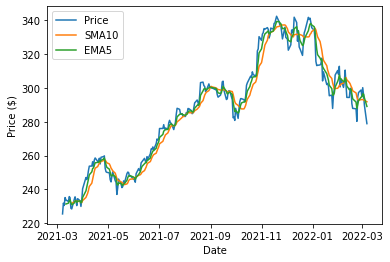

In [93]:
#plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label = 'Price')
plt.plot(df.index, df['SMA_10'], label = 'SMA10')
plt.plot(df.index, df['EMA_5'], label = 'EMA5')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price ($)')
#plt.savefig('mov_avg.pdf')

In [51]:
historical_data = pd.read_csv('historical_data.csv')
historical_data = historical_data.drop(['Unnamed: 0'], axis = 1)
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,percentChange,inc_or_dec
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,177.63,175.42,1.259834,1
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,175.42,198.63,-11.685043,-1
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,198.63,192.68,3.088022,1
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,192.68,174.79,10.235139,1
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,174.79,160.18,9.120989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,50000000,80000000,31000000,481000000,506000000,81000000,83.51,72.04,15.921710,1
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,43000000,296000000,385000000,458000000,484000000,298000000,72.04,63.76,12.986198,1
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,41000000,247000000,257000000,386000000,410000000,247000000,63.76,62.38,2.212248,1
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,41000000,239000000,284000000,377000000,402000000,238000000,62.38,53.37,16.882144,1


In [213]:
tickers = historical_data['Symbol'].unique()
tickers[tickers == 'BF.B'] = 'BF-B'
tickers[tickers == 'BRK.B'] = 'BRK-B'
tickers

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP',
       'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP',
       'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO',
       'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI',
       'BAX', 'BDX', 'BRK-B', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA',
       'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B',
       'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR',
       'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY',
       'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD',
       'CI', 'CINF', 'CTAS', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS',
       'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ',


In [58]:
msft = yf.Ticker("BF-B")
msft.history(period='1000y')[['Open', 'High', 'Low', 'Close', 'Volume']]

,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17,0.000000,0.203010,0.200994,0.200994,202500
1980-03-18,0.000000,0.200994,0.200994,0.200994,84375
1980-03-19,0.000000,0.203683,0.200994,0.203683,329063
1980-03-20,0.000000,0.204355,0.203010,0.204355,354375
1980-03-21,0.000000,0.204355,0.198977,0.201666,2910938
...,...,...,...,...,...
2022-03-01,65.070000,65.790001,64.230003,64.440002,1436100
2022-03-02,64.570000,65.419998,63.939999,64.820000,1635900
2022-03-03,66.330002,69.970001,66.330002,69.410004,1568700


In [212]:
# calculate moving average for all tickers
moving_average_df = pd.DataFrame({})
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    df = stock.history(period='10y')[['Open', 'High', 'Low', 'Close', 'Volume']]
    df['SMA_10'] = df['Close'].rolling(window = 10).mean()
    df['SMA_20'] = df['Close'].rolling(window = 20).mean()
    df['SMA_50'] = df['Close'].rolling(window = 50).mean()
    df.ta.ema(close='close', length=5, append=True)
    df['Symbol'] = tickers[i]
    df['Date'] = df.index
    moving_average_df = moving_average_df.append(df, ignore_index = True)
moving_average_df

- BRK.B: No data found, symbol may be delisted


,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_50,EMA_5,Symbol,Date
0,65.142719,65.801264,65.082168,65.634735,2603200.0,NaN,NaN,NaN,NaN,MMM,2012-03-08
1,65.710423,66.058617,65.589315,65.702858,1958300.0,NaN,NaN,NaN,NaN,MMM,2012-03-09
2,65.929950,66.421966,65.823978,66.263008,2049300.0,NaN,NaN,NaN,NaN,MMM,2012-03-12
3,66.429542,67.194053,66.240306,67.178917,3107100.0,NaN,NaN,NaN,NaN,MMM,2012-03-13
4,67.065344,67.557359,67.065344,67.269722,2960900.0,NaN,NaN,NaN,66.409848,MMM,2012-03-14
...,...,...,...,...,...,...,...,...,...,...,...
1201952,193.910004,195.000000,191.300003,192.539993,1669100.0,192.625000,196.316499,209.300659,192.643846,ZTS,2022-03-01
1201953,193.279999,197.270004,193.149994,196.070007,1355300.0,192.456001,196.176499,208.543373,193.785900,ZTS,2022-03-02
1201954,197.149994,197.289993,194.449997,195.869995,1052200.0,192.534001,195.861499,207.783085,194.480598,ZTS,2022-03-03
1201955,194.960007,196.960007,193.449997,196.839996,1467800.0,192.911000,195.657499,206.974706,195.267064,ZTS,2022-03-04


In [214]:
moving_average_df

,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_50,EMA_5,Symbol,Date
0,65.142719,65.801264,65.082168,65.634735,2603200.0,NaN,NaN,NaN,NaN,MMM,2012-03-08
1,65.710423,66.058617,65.589315,65.702858,1958300.0,NaN,NaN,NaN,NaN,MMM,2012-03-09
2,65.929950,66.421966,65.823978,66.263008,2049300.0,NaN,NaN,NaN,NaN,MMM,2012-03-12
3,66.429542,67.194053,66.240306,67.178917,3107100.0,NaN,NaN,NaN,NaN,MMM,2012-03-13
4,67.065344,67.557359,67.065344,67.269722,2960900.0,NaN,NaN,NaN,66.409848,MMM,2012-03-14
...,...,...,...,...,...,...,...,...,...,...,...
1201952,193.910004,195.000000,191.300003,192.539993,1669100.0,192.625000,196.316499,209.300659,192.643846,ZTS,2022-03-01
1201953,193.279999,197.270004,193.149994,196.070007,1355300.0,192.456001,196.176499,208.543373,193.785900,ZTS,2022-03-02
1201954,197.149994,197.289993,194.449997,195.869995,1052200.0,192.534001,195.861499,207.783085,194.480598,ZTS,2022-03-03
1201955,194.960007,196.960007,193.449997,196.839996,1467800.0,192.911000,195.657499,206.974706,195.267064,ZTS,2022-03-04


In [332]:
mmm = moving_average_df[moving_average_df['Symbol'] == 'MMM']
mmm

,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_50,EMA_5,Symbol,Date
0,65.142719,65.801264,65.082168,65.634735,2603200.0,NaN,NaN,NaN,NaN,MMM,2012-03-08
1,65.710423,66.058617,65.589315,65.702858,1958300.0,NaN,NaN,NaN,NaN,MMM,2012-03-09
2,65.929950,66.421966,65.823978,66.263008,2049300.0,NaN,NaN,NaN,NaN,MMM,2012-03-12
3,66.429542,67.194053,66.240306,67.178917,3107100.0,NaN,NaN,NaN,NaN,MMM,2012-03-13
4,67.065344,67.557359,67.065344,67.269722,2960900.0,NaN,NaN,NaN,66.409848,MMM,2012-03-14
...,...,...,...,...,...,...,...,...,...,...,...
2511,148.580002,149.020004,144.149994,144.750000,3313900.0,148.497360,154.657404,166.155415,147.048500,MMM,2022-03-01
2512,145.610001,148.369995,144.919998,147.220001,3734600.0,147.635999,153.727054,165.638276,147.105667,MMM,2022-03-02
2513,148.520004,149.990005,147.520004,148.300003,3804200.0,147.051999,152.888834,165.184533,147.503779,MMM,2022-03-03
2514,146.160004,147.690002,145.740005,146.729996,3235200.0,146.860999,152.084527,164.693844,147.245851,MMM,2022-03-04


In [333]:
def get_points_above(ma_low, ma_high):
    points_above = {}
    for pair in zip(ma_low, ma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index
            points_above[date] = pair[0]
    points_above = pd.Series(points_above, name = 'Price_Points')
    points_above.index.name = 'Date'
    return points_above

In [334]:
SMA20 = pd.DataFrame(mmm['SMA_20'])
SMA20['Date'] = mmm['Date']
SMA50 = pd.DataFrame(mmm['SMA_50'])
SMA50['Date'] = mmm['Date']
SMA20

,SMA_20,Date
0,NaN,2012-03-08
1,NaN,2012-03-09
2,NaN,2012-03-12
3,NaN,2012-03-13
4,NaN,2012-03-14
...,...,...
2511,154.657404,2022-03-01
2512,153.727054,2022-03-02
2513,152.888834,2022-03-03
2514,152.084527,2022-03-04


In [335]:
crossovers = pd.DataFrame()
crossovers['Date'] = SMA20['Date']
crossovers['Price'] = [i for i in mmm['Close']]
crossovers['SMA20'] = SMA20['SMA_20']
crossovers['SMA50'] = SMA50['SMA_50']
crossovers['position'] = crossovers['SMA20'] >= crossovers['SMA50']
crossovers['pre-position'] = crossovers['position'].shift(1)
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)
crossovers['Crossover'][0] = False
crossovers = crossovers.loc[crossovers['Crossover'] == True]
crossovers = crossovers.reset_index()
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0
for i in range(len(crossovers['SMA20'])):
    if crossovers['SMA20'][i] > crossovers['SMA50'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'
crossovers

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_13136/215852535.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Crossover'][0] = False
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_13136/215852535.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Binary_Signal'][i] = 1.0
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_13136/215852535.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Date,Price,SMA20,SMA50,Signal,Binary_Signal
0,2012-06-29,68.292030,65.768422,65.763013,Buy,1.0
1,2012-10-31,67.192963,70.854822,70.968278,Sell,0.0
2,2012-12-14,71.252045,70.076760,69.956504,Buy,1.0
3,2013-09-11,93.264397,90.246594,90.345525,Sell,0.0
4,2013-09-19,95.511337,91.354092,91.191961,Buy,1.0
5,2014-02-06,101.767059,104.576511,104.833652,Sell,0.0
6,2014-03-13,103.953590,105.343906,105.301306,Buy,1.0
7,2014-08-06,111.579521,114.798576,114.924427,Sell,0.0
8,2014-09-05,115.984978,115.031934,114.945970,Buy,1.0
9,2014-10-10,107.644020,114.291037,114.531336,Sell,0.0


In [336]:
SMA20 = mmm[['SMA_20', 'Date']].set_index('Date')['SMA_20']
SMA50 = mmm[['SMA_50', 'Date']].set_index('Date')['SMA_50']
mmm_series = mmm[['Close', 'Date']].set_index('Date')['Close']
SMA20

Date
2012-03-08           NaN
2012-03-09           NaN
2012-03-12           NaN
2012-03-13           NaN
2012-03-14           NaN
                 ...    
2022-03-01    154.657404
2022-03-02    153.727054
2022-03-03    152.888834
2022-03-04    152.084527
2022-03-07    151.288969
Name: SMA_20, Length: 2516, dtype: float64

In [337]:
mmm_series

Date
2012-03-08     65.634735
2012-03-09     65.702858
2012-03-12     66.263008
2012-03-13     67.178917
2012-03-14     67.269722
                 ...    
2022-03-01    144.750000
2022-03-02    147.220001
2022-03-03    148.300003
2022-03-04    146.729996
2022-03-07    143.279999
Name: Close, Length: 2516, dtype: float64

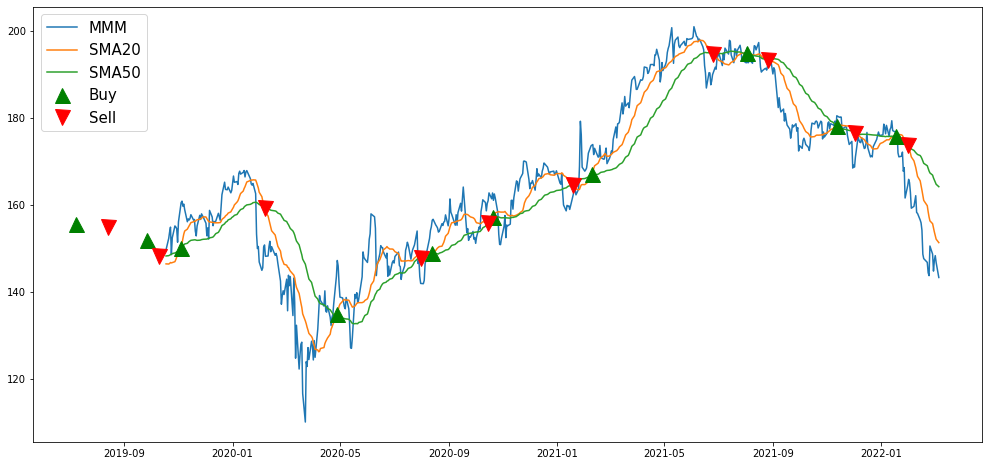

In [340]:

plt.figure(figsize=(17, 8))
plt.plot(mmm_series[-600:], label='MMM')
plt.plot(SMA20[-600:], label='SMA20')
plt.plot(SMA50[-600:], label='SMA50')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['Date'][-10:], 
         crossovers['SMA20'][crossovers.Signal == 'Buy'][-10:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['Date'][-10:], 
         crossovers['SMA20'][crossovers.Signal == 'Sell'][-10:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)

In [297]:
mmm_series

Date
2012-03-08     65.634735
2012-03-09     65.702858
2012-03-12     66.263008
2012-03-13     67.178917
2012-03-14     67.269722
                 ...    
2022-03-01    144.750000
2022-03-02    147.220001
2022-03-03    148.300003
2022-03-04    146.729996
2022-03-07    143.279999
Name: Close, Length: 2516, dtype: float64

In [306]:
spy_ticker = yf.Ticker('MMM')
spy = yf.download('MMM')

[*********************100%***********************]  1 of 1 completed


In [307]:
SMA10 = spy['Close'].rolling(window = 10).mean()
SMA20 = spy['Close'].rolling(window = 20).mean()
SMA50 = spy['Close'].rolling(window = 50).mean()
SMA100 = spy['Close'].rolling(window = 100).mean()

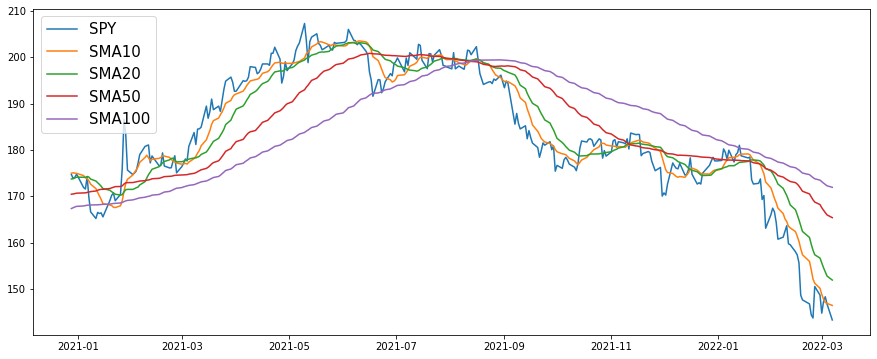

In [308]:
# taking last 300 trading days
plt.figure(figsize=(15, 6))
plt.plot(spy['Close'][-300:], label='SPY')
plt.plot(SMA10[-300:], label='SMA10')
plt.plot(SMA20[-300:], label='SMA20')
plt.plot(SMA50[-300:], label='SMA50')
plt.plot(SMA100[-300:], label='SMA100')
plt.legend(loc='upper left', fontsize=15)

In [309]:
def get_points_above(sma_low, sma_high):
    points_above = {}
    for pair in zip(sma_low, sma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index[0]
            points_above[date] = pair[0]
            
    points_above = pd.Series(points_above, name='Price_Points')
    points_above.index.name = 'Date'
            
    return points_above
points_above_SMA50 = get_points_above(SMA20, SMA50)

In [310]:
SMA20 = SMA20.reset_index()
SMA50 = SMA50.reset_index()

In [311]:
SMA20

,Date,Close
0,1970-01-02,NaN
1,1970-01-05,NaN
2,1970-01-06,NaN
3,1970-01-07,NaN
4,1970-01-08,NaN
...,...,...
13157,2022-03-01,155.584499
13158,2022-03-02,154.573999
13159,2022-03-03,153.655999
13160,2022-03-04,152.772999


In [312]:
crossovers = pd.DataFrame()
crossovers['Dates'] = SMA20['Date']
crossovers['Price'] = [i for i in spy['Close']]
crossovers['SMA20'] = SMA20['Close']
crossovers['SMA50'] = SMA50['Close']
crossovers['position'] = crossovers['SMA20'] >= crossovers['SMA50']
crossovers['pre-position'] = crossovers['position'].shift(1)
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)
crossovers['Crossover'][0] = False
crossovers

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_13136/1988855369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Crossover'][0] = False


,Dates,Price,SMA20,SMA50,position,pre-position,Crossover
0,1970-01-02,6.851563,NaN,NaN,False,NaN,False
1,1970-01-05,6.890625,NaN,NaN,False,False,False
2,1970-01-06,6.960938,NaN,NaN,False,False,False
3,1970-01-07,7.000000,NaN,NaN,False,False,False
4,1970-01-08,7.093750,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...
13157,2022-03-01,144.750000,155.584499,167.5344,False,False,False
13158,2022-03-02,147.220001,154.573999,166.9838,False,False,False
13159,2022-03-03,148.300003,153.655999,166.4970,False,False,False
13160,2022-03-04,146.729996,152.772999,165.9732,False,False,False


In [313]:
crossovers = crossovers.loc[crossovers['Crossover'] == True]
crossovers = crossovers.reset_index()
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0
for i in range(len(crossovers['SMA20'])):
    if crossovers['SMA20'][i] > crossovers['SMA50'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'
crossovers

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_13136/800305303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Binary_Signal'][i] = 1.0
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_13136/800305303.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Signal'][i] = 'Buy'
/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,Dates,Price,SMA20,SMA50,Signal,Binary_Signal
0,1970-03-13,6.625000,6.706641,6.702813,Buy,1.0
1,1970-03-19,6.445313,6.662500,6.662656,Sell,0.0
2,1970-08-10,5.171875,5.007813,4.987969,Buy,1.0
3,1970-11-19,5.343750,5.485547,5.486875,Sell,0.0
4,1970-12-08,5.875000,5.544922,5.544375,Buy,1.0
...,...,...,...,...,...,...
305,2021-08-24,194.750000,198.199500,198.207001,Sell,0.0
306,2021-11-12,183.660004,181.303500,181.094200,Buy,1.0
307,2021-12-01,170.729996,179.554500,179.577999,Sell,0.0
308,2022-01-19,178.479996,177.814500,177.584000,Buy,1.0


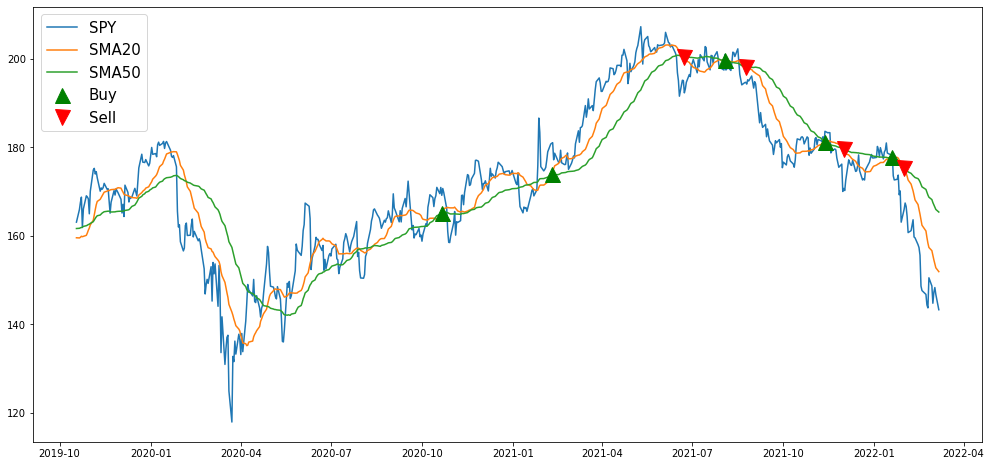

In [316]:
SMA20 = spy['Close'].rolling(window=20).mean()
SMA50 = spy['Close'].rolling(window=50).mean()
plt.figure(figsize=(17, 8))
plt.plot(spy['Close'][-600:], label='SPY')
plt.plot(SMA20[-600:], label='SMA20')
plt.plot(SMA50[-600:], label='SMA50')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['Dates'][-5:], 
         crossovers['SMA20'][crossovers.Signal == 'Buy'][-5:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['Dates'][-4:], 
         crossovers['SMA20'][crossovers.Signal == 'Sell'][-4:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)

In [317]:
SMA20

Date
1970-01-02           NaN
1970-01-05           NaN
1970-01-06           NaN
1970-01-07           NaN
1970-01-08           NaN
                 ...    
2022-03-01    155.584499
2022-03-02    154.573999
2022-03-03    153.655999
2022-03-04    152.772999
2022-03-07    151.900499
Name: Close, Length: 13162, dtype: float64

In [324]:
spy['Close'].index

DatetimeIndex(['1970-01-02', '1970-01-05', '1970-01-06', '1970-01-07',
               '1970-01-08', '1970-01-09', '1970-01-12', '1970-01-13',
               '1970-01-14', '1970-01-15',
               ...
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07'],
              dtype='datetime64[ns]', name='Date', length=13162, freq=None)